# Dive

wrapped in a python class

## Implementation

 - Dive profile is usually shown as a series of depth and time, in `MM:SS` format, points.
   - Need to convert the latter into decimal minutes,
   - and convert it to time and current depth.

 - constructor: initialize the model to ZH-L16C w/ 5-minute compartment,
   - diving air,
   - at sea level,
   - using $ RQ = 0.9 $
   - and fixed gradient factor 0.85
 
 - `segment()` takes the new depth and time and updates gas loadings.
 
 This also keeps track of the ceiling together with $ P_t $


## Animate

The profile is from a real dive, simplified. 

(TODO: change bar colour when TC has a ceiling)

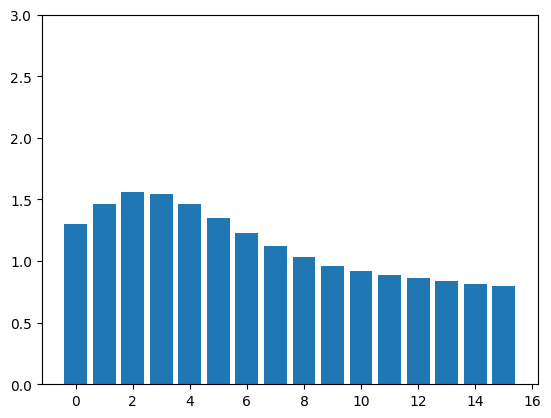

C:\Users\Akshay\AppData\Local\Temp\ipykernel_51820\4196307640.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(d.compartments, rotation = 45)


In [12]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import time

d = dive( verbose = False )
idx = np.arange( len( d.compartments ) )
fig, axes = plt.subplots(1,1)
hfig = display(fig, display_id=True)
axes.set_xticklabels(d.compartments, rotation = 45)
#axes.xticks( idx, d.compartments, rotation = 30 )
       

PROFILE = [(24,"1:40"),(30,"6:10"),(29,"10:20"),(23,"16:20"),(15,"21:30"),(10,"25:30"),(3,"40:0")]

for i in PROFILE :
    axes.clear()
    d.segment( newdepth = i[0], newtimestr = i[1] )
    axes.set_ylim( 0, 3.0 )
    axes.bar( idx, d.loadings )
    # display.display( axes.gcf() )
    fig.canvas.draw()
    fig.canvas.flush_events()
    hfig.update(fig)
    time.sleep( 1 )

plt.close (fig)